# Analyse regionaler Gesundhsiets- und Strukturdaten in Bayern

Dieses Notebook dient der Analyse und Verknüpfung regionaler Daten auf Landkreis- und Stadtkreisebene in Bayern.
Untersuccht werden:

- Krankenhausbetten pro 1000 Einwohner 2022
- Bevölkerungsprognose von 2022-2035
- Pflegebedürftige pro 100 Einwohner 2023

## Die Datenquellen stammen von der offiziellen INKAR-Website und wurden als Excel Dateien in dem Ordner "data" abgelegt.

In [1]:
# Nordbayern Filter
nordbayern_kreise = [
    #Oberfranken
    "Bamberg", "Bayreuth", "Coburg", "Hof",
    "Bamberg, Landkreis", "Bayreuth, Landkreis",
    "Coburg, Landkreis", "Forchheim", "Hof, Landkreis",
    "Kronach", "Kulmbach", "Lichtenfels", "Wunsiedel i. Fichtelgebirge",

    #Mittelfranken
    "Ansbach", "Erlangen", "Fürth", "Nürnberg", "Schwabach",
    "Ansbach, Landkreis", "Erlangen-Höchstadt",
    "Fürth, Landkreis", "Neustadt a.d. Aisch-Bad Windsheim",
    "Nürnberger Land", "Roth", "Weißenburg-Gunzenhausen",

    #Unterfranken
    "Aschaffenburg", "Schweinfurt", "Würzburg",
    "Aschaffenburg, Landkreis", "Bad Kissingen",
    "Haßberge", "Kitzingen", "Main-Spessart", 
    "Miltenberg", "Rhön-Grabfeld",
    "Schweinfurt, Landkreis", "Würzburg, Landkreis"

]

In [ ]:
# kreisfreie_staedte definieren

kreisfreie_staedte_nb = [
    "Ansbach", "Aschaffenburg", "Bamberg", "Bayreuth",
    "Coburg", "Erlangen", "Fürth", "Hof",
    "Nürnberg", "Schwabach", "Schweinfurt", "Würzburg"
]

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import re

def normalize_kreis(name: str) -> str:
    if pd.isna(name):
        return name
    n = str(name).strip()
   
    n = re.sub(r",\s*Landkreis$", "", n)
    return n


In [4]:
# Bevoelkerungsprognose einlesen
df_pop_raw = pd.read_excel("../data/bevoelkerungsprognose_2022_2035.xls")
df_pop_raw.head()

df_pop_raw.columns

df_pop = df_pop_raw.rename(columns={
    "Raumeinheit": "Kreis",
    df_pop_raw.columns[-1]: "Bev_Prognose_2022_2035"
})

df_pop["Kreis_clean"] = df_pop["Kreis"].apply(normalize_kreis)

df_pop[["Kreis", "Kreis_clean", "Bev_Prognose_2022_2035"]].head()

df_pop_nb = df_pop[df_pop["Kreis"].isin(nordbayern_kreise)].copy()
df_pop_nb.shape

df_pop_nb["Raumtyp"] = df_pop_nb["Kreis"].apply(
    lambda x: "Kreisfreie Stadt" if x in kreisfreie_staedte_nb else "Landkreis"
)

df_pop_nb[["Kreis", "Kreis_clean", "Raumtyp", "Bev_Prognose_2022_2035"]].head()

df_pop_nb_sorted = df_pop_nb.sort_values("Bev_Prognose_2022_2035", ascending=True)


WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


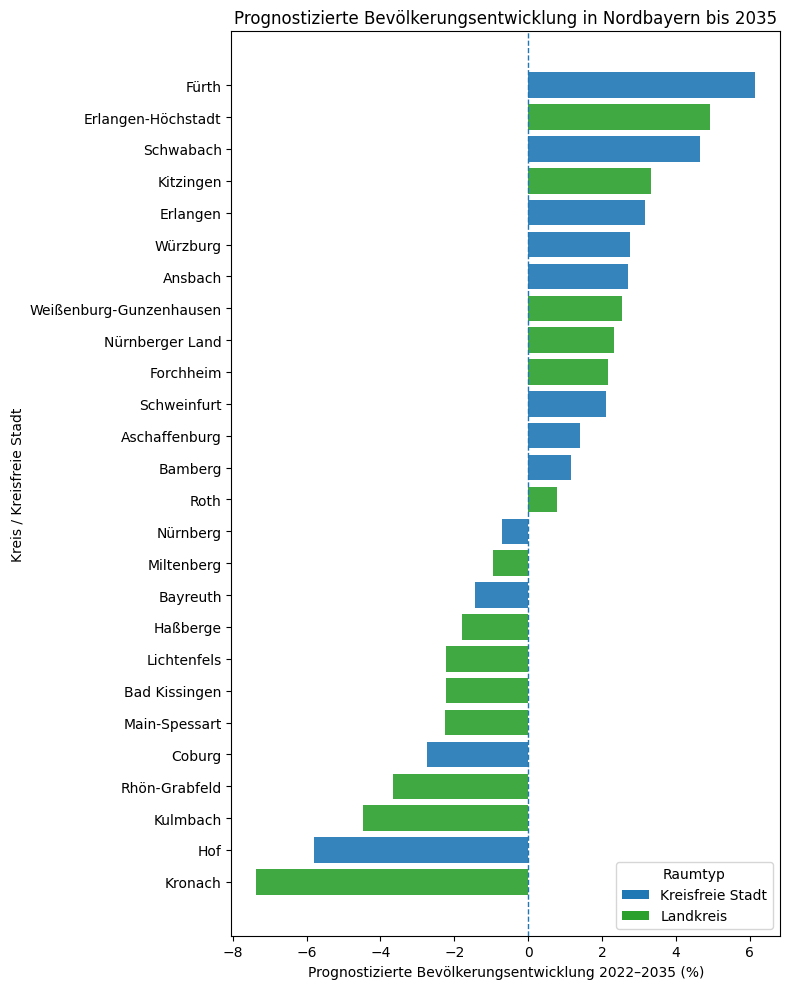

In [ ]:
# Balkendiagramm Prognose erstellen
colors = [
    "#1f77b4" if rt == "Kreisfreie Stadt" else "#2ca02c"
    for rt in df_pop_nb_sorted["Raumtyp"]
]

plt.figure(figsize=(8, 10))

plt.barh(
    df_pop_nb_sorted["Kreis"],
    df_pop_nb_sorted["Bev_Prognose_2022_2035"],
    color=colors,
    alpha=0.9
)

plt.axvline(0, linestyle="--", linewidth=1) 
plt.xlabel("Prognostizierte Bevölkerungsentwicklung 2022–2035 (%)")
plt.ylabel("Kreis / Kreisfreie Stadt")
plt.title("Prognostizierte Bevölkerungsentwicklung in Nordbayern bis 2035")

legend_elements = [
    Patch(facecolor="#1f77b4", label="Kreisfreie Stadt"),
    Patch(facecolor="#2ca02c", label="Landkreis")
]
plt.legend(handles=legend_elements, title="Raumtyp", loc="lower right")

plt.tight_layout()
plt.show()


In [6]:
#Pflegebedürftige einlesen
df_care_raw = pd.read_excel("../data/Pflegebeduerftige_2023.xls")
df_care_raw.head()


df_care_raw.columns

df_care = df_care_raw.rename(columns={
    "Raumeinheit": "Kreis",
    df_care_raw.columns[-1]: "Pflegebeduerftige_je_100"
})

df_care["Kreis_clean"] = df_care["Kreis"].apply(normalize_kreis)

df_care[["Kreis", "Kreis_clean", "Pflegebeduerftige_je_100"]].head()

df_care_nb = df_care[df_care["Kreis"].isin(nordbayern_kreise)].copy()
df_care_nb.shape


df_care_nb["Raumtyp"] = df_care_nb["Kreis"].apply(
    lambda x: "Kreisfreie Stadt" if x in kreisfreie_staedte_nb else "Landkreis"
)

df_care_nb[["Kreis", "Kreis_clean", "Raumtyp", "Pflegebeduerftige_je_100"]].head()


WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,Kreis,Kreis_clean,Raumtyp,Pflegebeduerftige_je_100
50,Bamberg,Bamberg,Kreisfreie Stadt,4.79
51,Bayreuth,Bayreuth,Kreisfreie Stadt,5.53
52,Coburg,Coburg,Kreisfreie Stadt,6.20
53,Forchheim,Forchheim,Landkreis,5.31
54,Hof,Hof,Kreisfreie Stadt,7.51


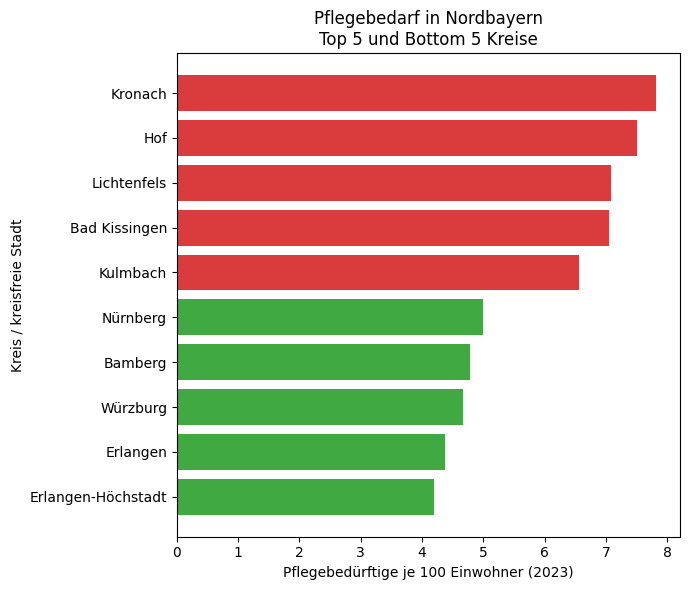

In [7]:
# Top / Bottom 5 vorbereiten; Balkendiagramm erstellen
n = 5

df_care_sorted = df_care_nb.sort_values("Pflegebeduerftige_je_100", ascending=True)

df_care_top_bottom = pd.concat([
    df_care_sorted.head(n),
    df_care_sorted.tail(n)
])

colors = [
    "#d62728" if val >= df_care_nb["Pflegebeduerftige_je_100"].median() else "#2ca02c"
    for val in df_care_top_bottom["Pflegebeduerftige_je_100"]
]

plt.figure(figsize=(7, 6))

plt.barh(
    df_care_top_bottom["Kreis_clean"],
    df_care_top_bottom["Pflegebeduerftige_je_100"],
    color=colors,
    alpha=0.9
)

plt.xlabel("Pflegebedürftige je 100 Einwohner (2023)")
plt.ylabel("Kreis / kreisfreie Stadt")
plt.title("Pflegebedarf in Nordbayern\nTop 5 und Bottom 5 Kreise")

plt.tight_layout()
plt.show()


In [8]:
#Pflegebetten einlesen

df_beds_raw = pd.read_excel("../data/Pflegebetten.xls")
df_beds_raw.head()
df_beds_raw.columns

df_beds = df_beds_raw.rename(columns={
    "Raumeinheit": "Kreis",
    df_beds_raw.columns[-1]: "Pflegebetten_je_10000"
})

df_beds["Pflegebetten_je_100"] = df_beds["Pflegebetten_je_10000"] / 100

df_beds["Kreis_clean"] = df_beds["Kreis"].apply(normalize_kreis)

df_beds[["Kreis", "Kreis_clean", "Pflegebetten_je_100"]].head()

df_beds_nb = df_beds[df_beds["Kreis"].isin(nordbayern_kreise)].copy()
df_beds_nb.shape

df_beds_nb["Raumtyp"] = df_beds_nb["Kreis"].apply(
    lambda x: "Kreisfreie Stadt" if x in kreisfreie_staedte_nb else "Landkreis"
)

df_beds_nb[["Kreis", "Kreis_clean", "Raumtyp", "Pflegebetten_je_100"]].head()


WARNING *** file size (15363) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,Kreis,Kreis_clean,Raumtyp,Pflegebetten_je_100
50,Bamberg,Bamberg,Kreisfreie Stadt,0.8540
51,Bayreuth,Bayreuth,Kreisfreie Stadt,1.2153
52,Coburg,Coburg,Kreisfreie Stadt,1.2270
53,Forchheim,Forchheim,Landkreis,0.7808
54,Hof,Hof,Kreisfreie Stadt,1.6315


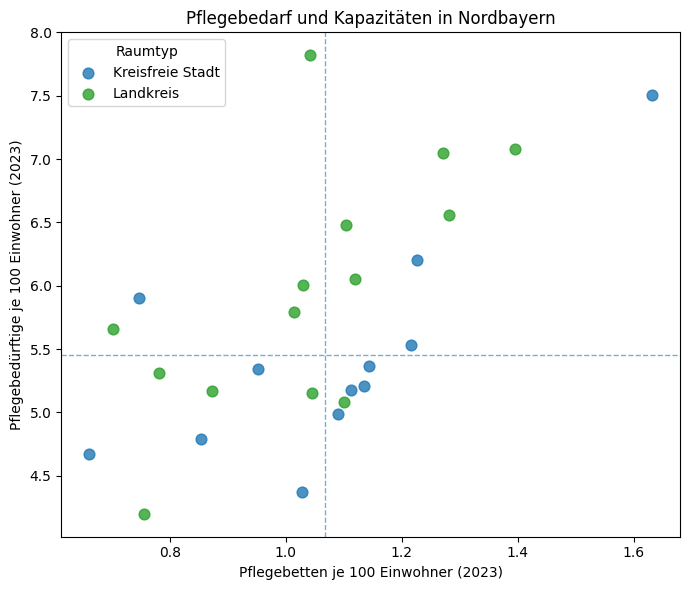

In [9]:
# Scatterplot Pflegebedürftige/Pflegebetten erstellen
df_scatter = pd.merge(
    df_care_nb[["Kreis_clean", "Pflegebeduerftige_je_100", "Raumtyp"]],
    df_beds_nb[["Kreis_clean", "Pflegebetten_je_100"]],
    on="Kreis_clean",
    how="inner"
)

plt.figure(figsize=(7, 6))

for rt, color in zip(
    ["Kreisfreie Stadt", "Landkreis"],
    ["#1f77b4", "#2ca02c"]
):
    subset = df_scatter[df_scatter["Raumtyp"] == rt]
    plt.scatter(
        subset["Pflegebetten_je_100"],
        subset["Pflegebeduerftige_je_100"],
        label=rt,
        color=color,
        alpha=0.8,
        s=60
    )

plt.axhline(
    df_scatter["Pflegebeduerftige_je_100"].median(),
    linestyle="--",
    linewidth=1,
    alpha=0.6
)

plt.axvline(
    df_scatter["Pflegebetten_je_100"].median(),
    linestyle="--",
    linewidth=1,
    alpha=0.6
)

plt.xlabel("Pflegebetten je 100 Einwohner (2023)")
plt.ylabel("Pflegebedürftige je 100 Einwohner (2023)")
plt.title("Pflegebedarf und Kapazitäten in Nordbayern")

plt.legend(title="Raumtyp")
plt.tight_layout()
plt.show()
